In [1]:
## Import modules
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import pylab as pl


/Users/Sebastian/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
## Get working directory
os.getcwd()

'/Users/Sebastian/Graduate School/DSC - 478 Machine Learning /Examples/Week 2/ipynb'

In [4]:
## Change working directory
os.chdir('/Users/Sebastian/Graduate School/DSC - 478 Machine Learning /Examples/Week 2')

#populate data into dataframe
pop_df = pd.read_csv("bank_data.csv", sep=',',header=None)
pop_df

In [83]:
pop_df.columns
#pop_df.values

Index(['id', 'age', 'income', 'children', 'gender', 'region', 'married', 'car',
       'savings_acct', 'current_acct', 'mortgage', 'pep'],
      dtype='object')

In [84]:
# get data types
pop_df.dtypes

id               object
age               int64
income          float64
children          int64
gender           object
region           object
married          object
car              object
savings_acct     object
current_acct     object
mortgage         object
pep              object
dtype: object

In [82]:
## Assign column to 3 objects that have numerical values 
age_df = pop_df["age"]
age_df
childern_df = pop_df["children"]
childern_df
income_df = pop_df["income"]
income_df

0      17546.00
1      30085.10
2      16575.40
3      20375.40
4      50576.30
5      37869.60
6       8877.07
7      24946.60
8      25304.30
9      24212.10
10     59803.90
11     26658.80
12     15735.80
13     55204.70
14     19474.60
15     22342.10
16     17729.80
17     41016.00
18     26909.20
19     22522.80
20     57880.70
21     16497.30
22     38446.60
23     15538.80
24     12640.30
25     41034.00
26     20809.70
27     20114.00
28     29359.10
29     24270.10
         ...   
570    33665.50
571    36166.20
572    27712.90
573    22400.70
574    28469.90
575    30488.00
576    19160.30
577    45342.50
578     6294.21
579    25127.70
580    51879.30
581    12644.90
582    21984.40
583    29093.10
584    23528.40
585     9516.91
586    18364.90
587    31273.80
588    49673.60
589    12623.40
590    23818.60
591    31473.90
592    20268.00
593    51417.00
594    30971.80
595    47025.00
596     9672.25
597    15976.30
598    14711.80
599    26671.60
Name: income, Length: 60

In [25]:
#question 1  mean of numerical values
print("Mean:")
pop_df[["age","children","income"]].mean()



Mean:


age            42.395000
children        1.011667
income      27524.031217
dtype: float64

In [26]:
#Question 1 standard dev 
print("Standard Deviation:")
pop_df[["age","children","income"]].std()


Standard Deviation:


age            14.424947
children        1.056752
income      12899.468246
dtype: float64

In [29]:
#question 1 median 
print("Median:")
pop_df[["age","children","income"]].median()


Median:


age            42.0
children        1.0
income      24925.3
dtype: float64

In [30]:
#descriptive stats for question 1
pop_df.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


age                                                        \
            count       mean        std   min    25%   50%    75%   max   
region                                                                    
INNER_CITY  269.0  41.992565  14.987306  18.0  28.00  41.0  56.00  67.0   
RURAL        96.0  43.010417  14.396268  18.0  31.00  44.0  55.25  67.0   
SUBURBAN     62.0  43.725806  15.222039  18.0  30.25  45.0  58.00  67.0   
TOWN        173.0  42.202312  13.299309  19.0  33.00  41.0  52.00  67.0   

           children             ...              income                \
              count      mean   ...     75%  max  count          mean   
region                          ...                                     
INNER_CITY    269.0  0.951673   ...     2.0  3.0  269.0  26843.999963   
RURAL          96.0  1.229167   ...     2.0  3.0   96.0  30027.605417   
SUBURBAN       62.0  0.967742   ...     2.0  3.0   62.0  28656.356935   
TOWN          173.0  1.000000   ...     2.0  3.0  173.0  26786.349653   

                                                                            
                     std      min        25%       50%        75%      max  
region                                                                      
INNER_CITY  13015.863373  6294.21  16352.200  24262.80  36166.200  61554.6  
RURAL       13699.154297  8639.24  19543.175  27630.15  41750.600  57398.1  
SUBURBAN    13888.950040  8143.75  17672.975  25430.00  37291.175  63130.1  
TOWN        11756.638715  5014.21  18504.300  24867.60  33204.300  59803.9  

[4 rows x 24 columns]

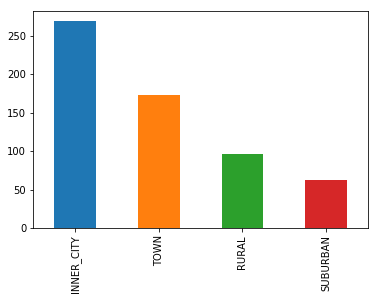

In [71]:
#quesiton 1 show difference between regions 
pop_df['region'].value_counts().plot(kind='bar')
pop_df.groupby("region").describe()

age                                                     children  \
     count       mean        std   min   25%   50%   75%   max    count   
pep                                                                       
NO   326.0  40.098160  14.123506  18.0  27.0  40.0  51.0  67.0    326.0   
YES  274.0  45.127737  14.327991  18.0  34.0  45.0  58.0  67.0    274.0   

                ...              income                                       \
         mean   ...     75%  max  count          mean           std      min   
pep             ...                                                            
NO   1.067485   ...     2.0  3.0  326.0  24900.953374  11661.123422  5014.21   
YES  0.945255   ...     1.0  3.0  274.0  30644.919453  13609.613043  7756.36   

                                             
           25%       50%       75%      max  
pep                                          
NO   15366.475  23105.00  31210.90  61554.6  
YES  19639.475  28080.05  38458.35  63130.1  

[2 rows x 24 columns]

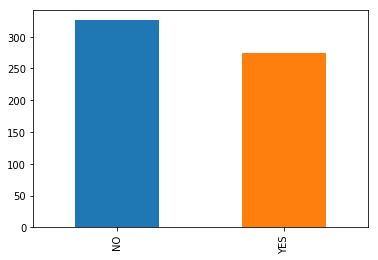

In [67]:
#quesiton 1 pep
pop_df['pep'].value_counts().plot(kind='bar')
pop_df.groupby("pep").describe()


age                                                     children  \
        count       mean        std   min   25%   50%   75%   max    count   
gender                                                                       
FEMALE  300.0  43.693333  14.672545  18.0  31.0  44.0  57.0  67.0    300.0   
MALE    300.0  41.096667  14.077924  18.0  29.0  40.0  52.0  67.0    300.0   

                   ...              income                              \
            mean   ...     75%  max  count          mean           std   
gender             ...                                                   
FEMALE  1.026667   ...     2.0  3.0  300.0  27831.368233  13031.258242   
MALE    0.996667   ...     2.0  3.0  300.0  27216.694200  12780.682144   

                                                        
            min        25%      50%       75%      max  
gender                                                  
FEMALE  7549.38  17711.100  25448.9  34873.10  63130.1  
MALE    5014.21  16805.175  24449.2  36610.85  59409.1  

[2 rows x 24 columns]

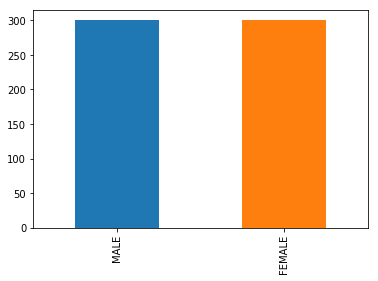

In [68]:
#quesiton 1 gender
pop_df['gender'].value_counts().plot(kind='bar')
pop_df.groupby("gender").describe()


age                                                       children  \
         count       mean        std   min    25%   50%    75%   max    count   
married                                                                         
NO       204.0  42.186275  14.477590  18.0  29.75  43.0  54.50  67.0    204.0   
YES      396.0  42.502525  14.414918  18.0  30.00  42.0  55.25  67.0    396.0   

                    ...              income                              \
             mean   ...     75%  max  count          mean           std   
married             ...                                                   
NO       1.083333   ...     2.0  3.0  204.0  27674.627108  13391.270334   
YES      0.974747   ...     2.0  3.0  396.0  27446.451515  12655.229551   

                                                          
             min       25%       50%        75%      max  
married                                                   
NO       5014.21  16816.00  25890.65  36300.875  60747.5  
YES      7723.93  17555.25  24718.25  36113.475  63130.1  

[2 rows x 24 columns]

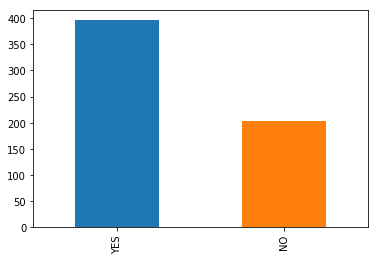

In [81]:
pop_df['married'].value_counts().plot(kind='bar')
pop_df.groupby("married").describe()

age                                                      children  \
     count       mean        std   min   25%   50%    75%   max    count   
car                                                                        
NO   304.0  41.289474  14.488931  18.0  28.0  41.0  53.25  67.0    304.0   
YES  296.0  43.530405  14.294449  18.0  32.0  43.0  56.25  67.0    296.0   

                ...              income                                       \
         mean   ...     75%  max  count          mean           std      min   
car             ...                                                            
NO   0.973684   ...     2.0  3.0  304.0  26486.807336  12973.040522  6294.21   
YES  1.050676   ...     2.0  3.0  296.0  28589.288176  12757.662091  5014.21   

                                              
           25%       50%        75%      max  
car                                           
NO   16383.850  23312.55  34598.275  61554.6  
YES  18046.675  26665.20  36591.500  63130.1  

[2 rows x 24 columns]

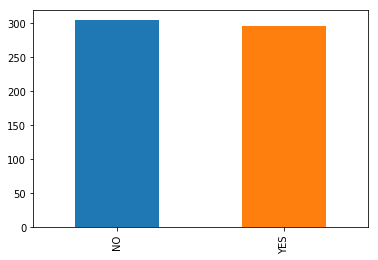

In [85]:
pop_df['car'].value_counts().plot(kind='bar')
pop_df.groupby("car").describe()

age                                                       \
              count       mean        std   min    25%   50%   75%   max   
savings_acct                                                               
NO            186.0  38.430108  13.309129  18.0  27.00  37.5  48.0  67.0   
YES           414.0  44.176329  14.566548  18.0  32.25  45.0  57.0  67.0   

             children             ...              income                \
                count      mean   ...     75%  max  count          mean   
savings_acct                      ...                                     
NO              186.0  0.946237   ...     2.0  3.0  186.0  22405.999194   
YES             414.0  1.041063   ...     2.0  3.0  414.0  29823.436908   

                                                                              
                       std      min        25%       50%        75%      max  
savings_acct                                                                  
NO             8151.117426  7549.38  16307.225  22281.25  27968.225  39547.8  
YES           13945.481952  5014.21  17886.525  27734.60  41005.225  63130.1  

[2 rows x 24 columns]

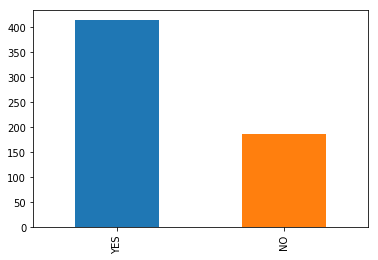

In [86]:
pop_df['savings_acct'].value_counts().plot(kind='bar')
pop_df.groupby("savings_acct").describe()

age                                                      \
              count       mean        std   min   25%   50%   75%   max   
current_acct                                                              
NO            145.0  43.296552  13.741727  18.0  32.0  42.0  57.0  67.0   
YES           455.0  42.107692  14.638953  18.0  29.0  42.0  54.0  67.0   

             children             ...              income                \
                count      mean   ...     75%  max  count          mean   
current_acct                      ...                                     
NO              145.0  1.000000   ...     2.0  3.0  145.0  26802.195655   
YES             455.0  1.015385   ...     2.0  3.0  455.0  27754.066725   

                                                                          
                       std      min       25%      50%      75%      max  
current_acct                                                              
NO            11841.829836  7606.25  17839.90  24554.1  33615.4  57880.7  
YES           13222.825776  5014.21  17144.35  25132.9  36594.0  63130.1  

[2 rows x 24 columns]

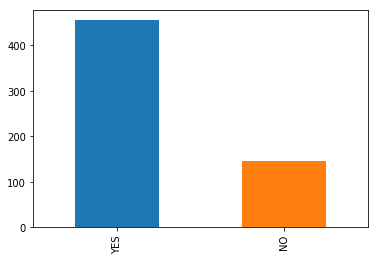

In [87]:
pop_df['current_acct'].value_counts().plot(kind='bar')
pop_df.groupby("current_acct").describe()

age                                                     children  \
          count       mean        std   min   25%   50%   75%   max    count   
mortgage                                                                       
NO        391.0  42.565217  14.461805  18.0  30.0  43.0  54.5  67.0    391.0   
YES       209.0  42.076555  14.384951  18.0  31.0  41.0  56.0  67.0    209.0   

                     ...              income                              \
              mean   ...     75%  max  count          mean           std   
mortgage             ...                                                   
NO        1.069054   ...     2.0  3.0  391.0  27662.194680  13199.249366   
YES       0.904306   ...     2.0  3.0  209.0  27265.553158  12345.988391   

                                                        
              min       25%      50%      75%      max  
mortgage                                                
NO        7549.38  17144.35  25127.7  36434.6  63130.1  
YES       5014.21  17866.90  24763.3  34852.3  60747.5  

[2 rows x 24 columns]

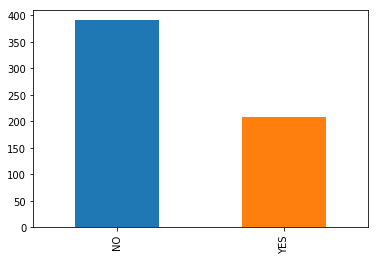

In [88]:
pop_df['mortgage'].value_counts().plot(kind='bar')
pop_df.groupby("mortgage").describe()


In [76]:
#question 2 

#set up costumers that signed up for PEP
pep_yes = pop_df[pop_df.pep=="YES"]
#pep_yes

#set up customers that didnt sign up for PEP
pep_no = pop_df[pop_df.pep=="NO"]
#pep_no

In [77]:
pep_yes.describe()

,age,income,children
count,274.000000,274.000000,274.000000
mean,45.127737,30644.919453,0.945255
std,14.327991,13609.613043,0.860571
min,18.000000,7756.360000,0.000000
25%,34.000000,19639.475000,0.000000
50%,45.000000,28080.050000,1.000000
75%,58.000000,38458.350000,1.000000
max,67.000000,63130.100000,3.000000


In [78]:
pep_no.describe()
#When PEP = NO the mean age falls by 5 and the income decreases by 50,000 while the childeren mean stays close to 1. 
# We also see that for the STD deviation for chidleren when PEP is no, that we are generall going above 1 child, indicating that 
#customers that enroll in pep have fewer childern than customers that dont enroll within PEP program. 

,age,income,children
count,326.000000,326.000000,326.000000
mean,40.098160,24900.953374,1.067485
std,14.123506,11661.123422,1.195524
min,18.000000,5014.210000,0.000000
25%,27.000000,15366.475000,0.000000
50%,40.000000,23105.000000,0.000000
75%,51.000000,31210.900000,2.000000
max,67.000000,61554.600000,3.000000


age                                                        \
            count       mean        std   min    25%   50%    75%   max   
region                                                                    
INNER_CITY  146.0  40.123288  14.760567  18.0  27.00  39.5  52.00  67.0   
RURAL        50.0  41.900000  14.331712  18.0  27.50  44.0  54.75  65.0   
SUBURBAN     28.0  39.607143  14.533077  18.0  27.00  38.5  49.00  66.0   
TOWN        102.0  39.313725  13.064183  19.0  29.25  37.0  47.75  67.0   

           children             ...              income                \
              count      mean   ...     75%  max  count          mean   
region                          ...                                     
INNER_CITY    146.0  1.061644   ...     2.0  3.0  146.0  25030.376712   
RURAL          50.0  1.280000   ...     2.0  3.0   50.0  27900.276800   
SUBURBAN       28.0  0.928571   ...     2.0  3.0   28.0  23867.310000   
TOWN          102.0  1.009804   ...     2.0  3.0  102.0  23529.189020   

                                                                           
                     std      min        25%      50%        75%      max  
region                                                                     
INNER_CITY  12491.134335  6294.21  14648.875  22914.8  34208.650  61554.6  
RURAL       12235.678630  8639.24  18419.275  25432.7  38879.225  51284.3  
SUBURBAN    10148.437314  9316.98  15675.575  23735.1  29471.325  46461.5  
TOWN        10330.784099  5014.21  16368.675  22120.9  29153.700  59803.9  

[4 rows x 24 columns]

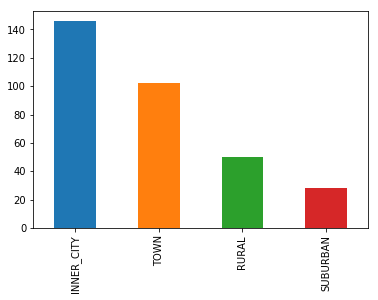

In [79]:
#question 2
pep_no['region'].value_counts().plot(kind='bar')
pep_no.groupby("region").describe()

age                                                        \
            count       mean        std   min    25%   50%    75%   max   
region                                                                    
INNER_CITY  123.0  44.211382  15.011063  18.0  30.50  44.0  59.00  67.0   
RURAL        46.0  44.217391  14.526471  18.0  34.25  44.5  56.25  67.0   
SUBURBAN     34.0  47.117647  15.141284  19.0  35.75  47.5  60.00  67.0   
TOWN         71.0  46.352113  12.598298  20.0  37.50  45.0  58.00  67.0   

           children             ...              income                \
              count      mean   ...     75%  max  count          mean   
region                          ...                                     
INNER_CITY    123.0  0.821138   ...     1.0  3.0  123.0  28996.756016   
RURAL          46.0  1.173913   ...     2.0  3.0   46.0  32339.919130   
SUBURBAN       34.0  1.000000   ...     2.0  3.0   34.0  32600.277941   
TOWN           71.0  0.985915   ...     1.0  3.0   71.0  31465.650845   

                                                                            
                     std      min        25%       50%        75%      max  
region                                                                      
INNER_CITY  13345.419327  7756.36  17997.100  25334.30  37248.500  59805.6  
RURAL       14922.198266  8877.07  21159.725  28166.05  47457.800  57398.1  
SUBURBAN    15389.188703  8143.75  22078.575  29248.40  46862.975  63130.1  
TOWN        12164.128993  9465.21  22124.600  30799.50  37509.800  59503.8  

[4 rows x 24 columns]

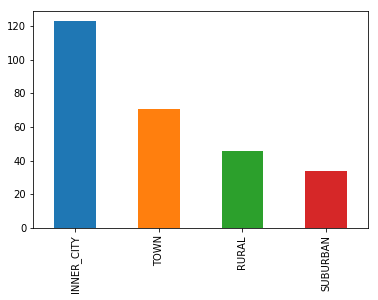

In [80]:
#question 2 
pep_yes['region'].value_counts().plot(kind='bar')
pep_yes.groupby("region").describe()
# I also noticed that people that live in the suburbs tend to enroll within the PEP program

age                                                     children  \
     count       mean        std   min   25%   50%   75%   max    count   
car                                                                       
NO   168.0  39.232143  14.004693  18.0  27.0  38.5  49.0  67.0    168.0   
YES  158.0  41.018987  14.235271  18.0  30.0  40.0  52.0  67.0    158.0   

                ...              income                                       \
         mean   ...     75%  max  count          mean           std      min   
car             ...                                                            
NO   1.000000   ...     2.0  3.0  168.0  24213.004643  11949.637304  6294.21   
YES  1.139241   ...     2.0  3.0  158.0  25632.443165  11338.301801  5014.21   

                                             
           25%       50%       75%      max  
car                                          
NO   14601.425  21763.45  29562.55  61554.6  
YES  16319.200  24907.10  33395.00  53104.3  

[2 rows x 24 columns]

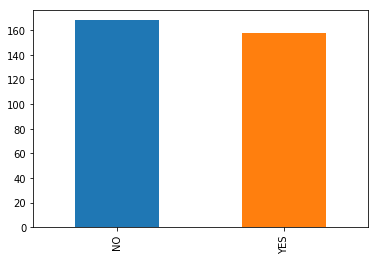

In [97]:
#QUestion 2 
pep_no['car'].value_counts().plot(kind='bar')
pep_no.groupby("car").describe()

age                                                      children  \
     count       mean        std   min   25%   50%    75%   max    count   
car                                                                        
NO   136.0  43.830882  14.723403  19.0  32.0  43.5  57.25  67.0    136.0   
YES  138.0  46.405797  13.862009  18.0  36.0  46.5  59.00  67.0    138.0   

                ...               income                                       \
         mean   ...      75%  max  count          mean           std      min   
car             ...                                                             
NO   0.941176   ...     1.00  3.0  136.0  29295.622426  13664.419708  7756.36   
YES  0.949275   ...     1.75  3.0  138.0  31974.661449  13472.644086  9362.58   

                                              
           25%       50%        75%      max  
car                                           
NO   18342.550  26397.40  37855.350  60747.5  
YES  21468.075  30193.95  40616.625  63130.1  

[2 rows x 24 columns]

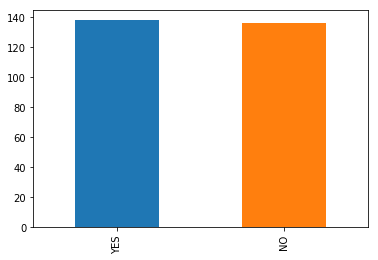

In [96]:
#Question 2 
pep_yes['car'].value_counts().plot(kind='bar')
pep_yes.groupby("car").describe()

#ran an analysis on all other variables and the difference between PEP and NO PEP doesnt really vary between cateogries, 
#seems to be a close even split amongs all the other cateogrical variables. 

In [102]:
#Start of Question 3
#Set up Z score for income 

Z_income = pop_df[["income"]]
Z_income = (Z_income - Z_income.mean()) / Z_income.std()
Z_income.head()
#Z_income

,income
0,-0.773523
1,0.198541
2,-0.848766
3,-0.554180
4,1.787071


In [104]:
#apply Z score transformation to income 
zscore = lambda x: (x - x.mean()) / x.std()
Z_income_std = Z_income.apply(zscore)
Z_income_std.head(20)

,income
0,-0.773523
1,0.198541
2,-0.848766
3,-0.554180
4,1.787071
5,0.802015
6,-1.445560
7,-0.199809
8,-0.172079
9,-0.256749


In [118]:
#Question 4
# bin age groups into 3 values 
ageDF = pd.DataFrame(columns=['age bucket'])

pop_df["age"]

for x in pop_df["age"]:
    if x <= 30: #if age is less or equal to 30 30 
        #print(x)
        ageDF = ageDF.append({'age bucket':'YOUNG'}, ignore_index=True)
    elif x <= 50: #age is less than or equal to 50
        ageDF = ageDF.append({'age bucket':'MID-AGE'}, ignore_index=True)
    else: #anything else should be OLD
        ageDF = ageDF.append({'age bucket':'OLD'}, ignore_index=True)
    
        



In [124]:
#Question 5 

min_income = pop_df["income"].min()
max_income = pop_df["income"].max()
print(min_income, max_income)

min_age = pop_df["age"].min()
max_age = pop_df["age"].max()
print(min_age, max_age)

min_children = pop_df["children"].min()
max_children = pop_df["children"].max()
print(min_children, max_children)


5014.21 63130.1
18 67
0 3


In [129]:
#question 5
norm_income = (pop_df["income"] - min_income) / (max_income-min_income)
norm_age = (pop_df["age"] - min_age) / (max_age-min_age)
norm_children = (pop_df["children"] - min_children) / (max_children-min_children)


In [147]:
#question 6 add in normalized columns to data set to export to excel
#new_table_excel concat existing tables with new columns 
new_table_excel = pd.concat([pop_df, norm_income], axis=1)
new_table_excel = pd.concat([new_table_excel, norm_age], axis=1)
new_table_excel = pd.concat([new_table_excel, norm_children], axis=1)

#set up dummy variables for categorical variables 
dummyRegion = pd.get_dummies(pop_df["region"])
dummyGender = pd.get_dummies(pop_df["gender"])
dummyMarried = pd.get_dummies(pop_df["married"])
dummyMarried.columns = ['N0_married', 'Yes_married']

dummyCar = pd.get_dummies(pop_df["car"])
dummyCar.columns = ['No_Car', 'Yes_Car'] #rename columns easier to read 

dummySA = pd.get_dummies(pop_df["savings_acct"])
dummySA.columns = ['No_SA', 'Yes_SA']

dummyCA = pd.get_dummies(pop_df["current_acct"])
dummyCA.columns = ['No_CA', 'Yes_CA']

dummyMortgage = pd.get_dummies(pop_df["mortgage"])
dummyMortgage.columns = ['No_Mortgage', 'Yes_Mortgage']

dummyPep = pd.get_dummies(pop_df["pep"])
dummyPep.columns = ['No_Pep', 'Yes_Pep']

new_table_excel = pd.concat([new_table_excel, dummyRegion,dummyGender,dummyMarried,dummyCar,dummySA,dummyCA,dummyMortgage,dummyPep], axis=1)

In [150]:
new_table_excel
#print out table to check dummy tables with new excel table


In [149]:
#question 6 Export Excel

new_table_excel.to_csv('bank_numeric.csv') #export excel to directory 

In [152]:
#question 7 

#standard data 
pop_df[["income","age","children"]].corr()


,income,age,children
income,1.000000,0.752726,0.036761
age,0.752726,1.000000,0.023572
children,0.036761,0.023572,1.000000


In [168]:
#question 7 
#normalized data 

df = pd.DataFrame({'Norm_Income' : norm_income}) #create new datafram to hold normalized values 
norm_table = pd.concat([df, norm_age], axis=1) #add on on existing to new dataframe created 
norm_table = pd.concat([norm_table, norm_children], axis=1)


norm_table.columns = ['Norm_Income', 'Norm_age','Norm_children'] #rename columns easier to read 

norm_table.corr()

#From the correlation matrix we see that Age and income we have a postive realtionship, trending towards 1, indicating 
#that as the older a person gets, the higher the income for that indivudal, which makes sense when you take a look 
#at the data from the CSV file. 
#Like wise we see a lower value for children and income, it seems that the more children a person has, the less the income
#would be for that indivudal. I would suggest thats its a weak realtionship. 
#The intresting thing with this correlation we see that age and children do not have a strong realtionship. 

,Norm_Income,Norm_age,Norm_children
Norm_Income,1.000000,0.752726,0.036761
Norm_age,0.752726,1.000000,0.023572
Norm_children,0.036761,0.023572,1.000000


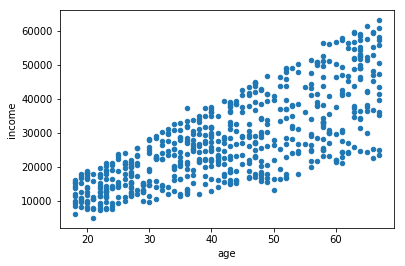

In [169]:
#question 8 


## Plot age vs income to see if we have any correlation 
pop_df.plot(x="age", y="income", kind="scatter")

#running the scatter plot, we clealer see a strong corrleation between age and income. 
#the older a person becomes, the higher the income that indivudal will obtain. 
#I would label this a postive realtionship. 


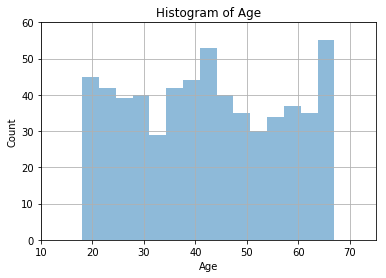

In [177]:
#Question 9 


## Histogram with legend, axis labels, title, and grid
plt.hist(pop_df["age"], bins=15, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.axis([10, 75, 0, 60])
plt.grid(True)


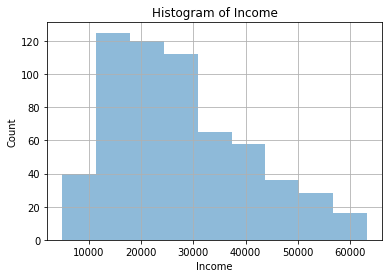

In [176]:
#Question 9 
plt.hist(pop_df["income"], bins=9, alpha=0.5)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Histogram of Income')
#plt.axis([5, 80, 0, 60])
plt.grid(True)

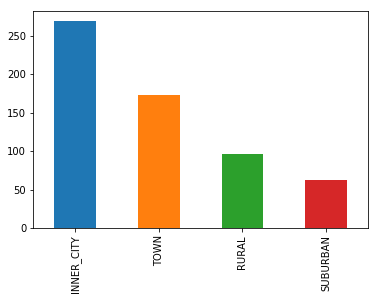

In [178]:
#question 10 

pop_df['region'].value_counts().plot(kind='bar')

In [182]:
#question 11


#Pep_Yes_Re = pd.crosstab(pep_yes["pep"], pep_yes["region"])
#Pep_Yes_Re
Pep_Region = pd.crosstab(pop_df["region"],pop_df["pep"])
Pep_Region

pep,NO,YES
region,,
INNER_CITY,146,123
RURAL,50,46
SUBURBAN,28,34
TOWN,102,71


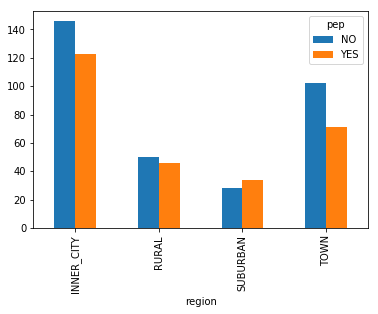

In [183]:
#question 11
plt.show(Pep_Region.plot(kind="bar"))